In [2]:
# 필요한 패키지 설치
#pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df_sp=df.drop('CustomerID',axis=1)

In [6]:
df_sp

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


c:\Users\qorud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


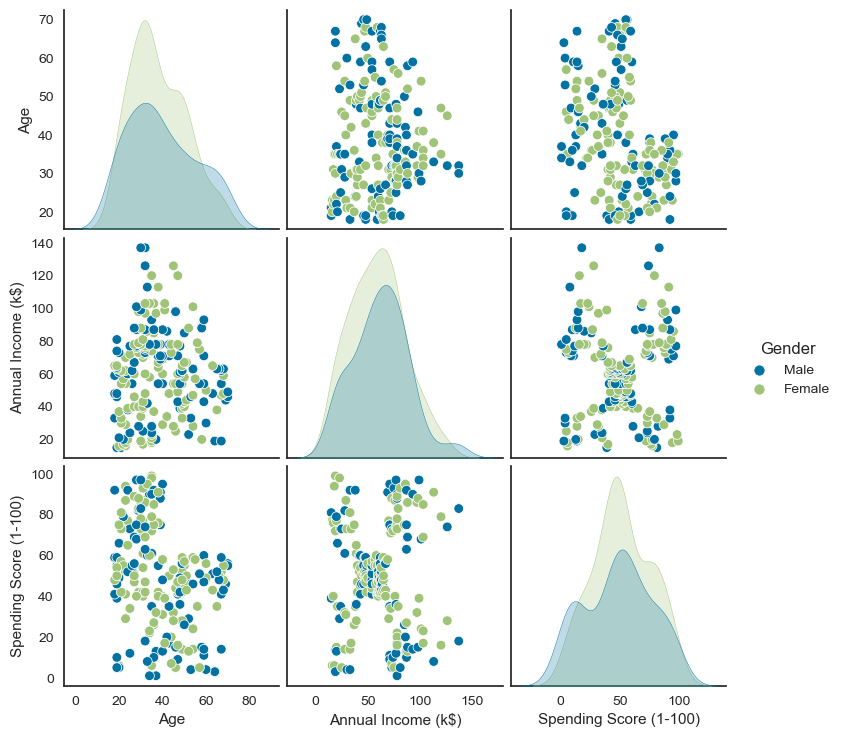

In [7]:
sns.set_style('ticks')
sns.pairplot(df_sp, hue='Gender')
plt.show()

In [8]:
df_km = pd.get_dummies(df_sp, columns = ['Gender'],drop_first=True)

In [9]:
mns = MinMaxScaler()

df_mns = mns.fit_transform(df_km)

In [10]:
df_mns_sp = pd.DataFrame(data= df_mns, columns = df_km.columns)
df_mns_sp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


In [11]:
kmeans_model1 =KMeans(n_clusters = 3, random_state=111)

In [12]:
kmeans_model1.fit(df_mns_sp)

c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

In [13]:
print(kmeans_model1.inertia_)
print(kmeans_model1.cluster_centers_)
print(kmeans_model1.n_iter_)
print(kmeans_model1.labels_)

29.552857611943857
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
5
[2 2 0 0 0 0 0 0 1 0 1 0 0 0 1 2 0 2 1 0 1 2 0 2 0 2 0 2 0 0 1 0 1 2 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 2 0 1 0 1 0 1 0 1 1 2 0 0 1 2 0 0 2 0 1 0 0 0
 1 2 0 1 0 0 1 2 1 0 0 1 0 0 0 0 0 2 1 0 0 2 0 0 1 2 0 0 1 2 1 0 0 1 1 1 1
 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 1 2 1 2 1 2 0 0 1 0 0 2 1 0 0 2 0 0 1 2 1 0
 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 2 1 2 1 2 0 0 1 2 1 2 0 0 1 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 2 1 2]


c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

<Axes: >

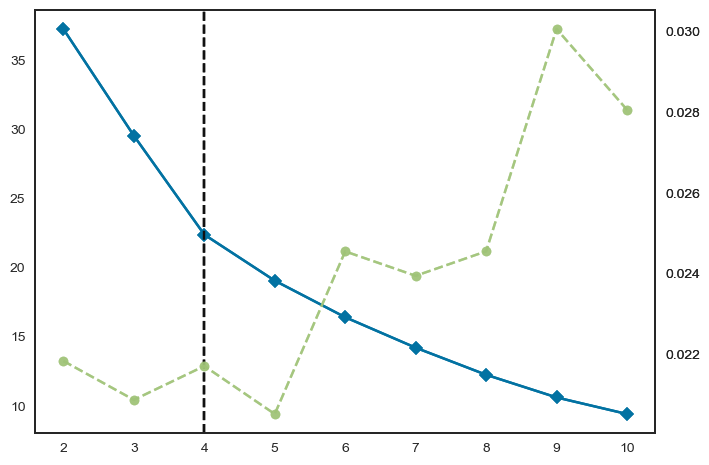

In [14]:
Elbow_ch =KElbowVisualizer(kmeans_model1)
Elbow_ch.fit(df_mns_sp)
Elbow_ch.draw() 

c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

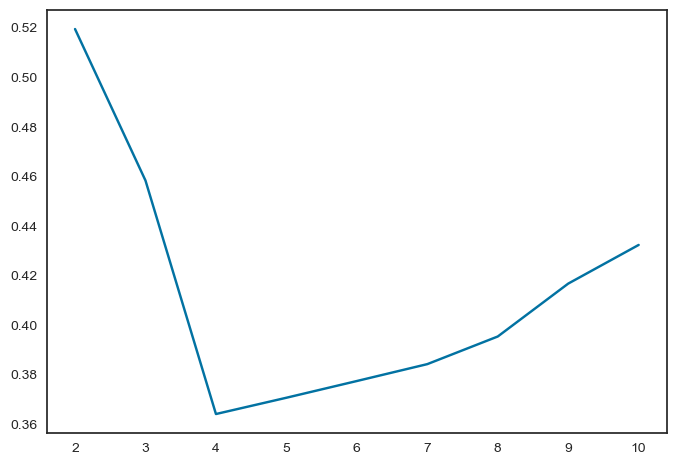

In [15]:
KMeans_model1={'random_state':111}
sil_coef = []
for i in range(2,11):
    kmeans_sil = KMeans(n_clusters = i, **KMeans_model1)
    kmeans_sil.fit(df_mns_sp) #데이터 학습
    score = silhouette_score(df_mns_sp, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2,11), sil_coef)
plt.xticks(range(2,11))
plt.show()

c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\qorud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

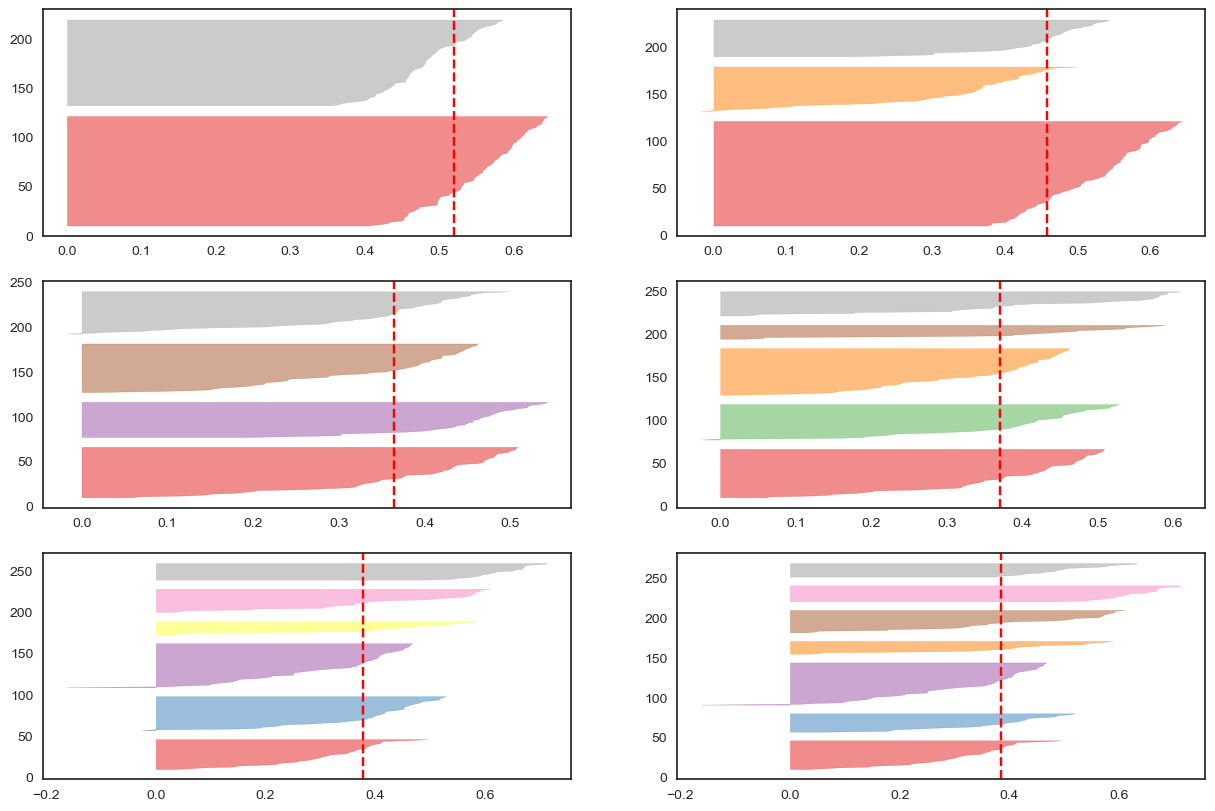

In [16]:
fig, ax = plt.subplots(3,2 , figsize=(15,10))

for i in [2,3,4,5,6,7]:
    kmeans_model3 = KMeans(
        n_clusters=i,
        random_state=111 )
    q, mod = divmod(i,2)

    visual = SilhouetteVisualizer(kmeans_model3,
                                 color = 'yellowbricks',
                                 ax=ax[q-1][mod])
    visual.fit(df_mns_sp)
